In [4]:
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
sns.set()

In [5]:
data = pd.read_csv(config.MAIN_DATA)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
#shuffle the dataset
data = data.sample(frac=1)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4030,4031,15808760,Evseev,603,Spain,Female,42,6,0.00,1,1,1,90437.87,0
4998,4999,15792916,Ositadimma,559,Spain,Female,40,7,144470.77,1,1,1,18917.95,0
5119,5120,15668142,Chang,700,France,Male,37,3,77608.46,2,1,1,175373.46,0
7158,7159,15591010,McDonald,434,Germany,Male,55,8,109339.17,2,1,0,96405.88,1
3490,3491,15809137,Sagese,453,France,Male,29,6,0.00,1,0,0,198376.02,1


In [3]:
#save the 10% of the data as the test data
#select last 1000 rows as the test data
train_data = data[:9000]
test_data = data[9000:]

#save the train and test data to csv files
train_data.to_csv("./data/training_data.csv",index=False)
test_data.to_csv("./data/testing_data.csv",index=False)

In [4]:
train_data.shape

(9000, 14)

In [5]:
train_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
train_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,5006.173667,1.569078e+07,650.801333,38.876333,5.016444,76808.384973,1.533667,0.703556,0.515111,100059.754691,0.204444
std,2889.413956,7.188657e+04,96.971343,10.411563,2.896510,62420.589530,0.585011,0.456715,0.499799,57500.777203,0.403317
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2511.750000,1.562820e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50871.095000,0.000000
50%,5002.500000,1.569076e+07,652.000000,37.000000,5.000000,97350.825000,1.000000,1.000000,1.000000,100350.530000,0.000000
75%,7519.250000,1.575309e+07,718.000000,44.000000,8.000000,127758.585000,2.000000,1.000000,1.000000,149146.910000,0.000000
max,9999.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
train_data.Exited.value_counts()/data.shape[0]

0    0.716
1    0.184
Name: Exited, dtype: float64

In [8]:
train_data.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [9]:
geography_region_counts = train_data["Geography"].value_counts()
geography_region_counts

France     4507
Germany    2262
Spain      2231
Name: Geography, dtype: int64

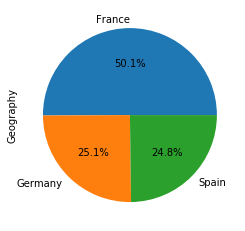

In [10]:
geography_region_counts.plot.pie(autopct="%.1f%%");

<IPython.core.display.Javascript object>

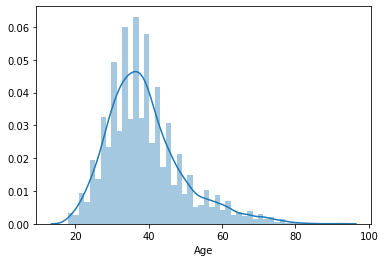

In [11]:
sns.distplot(data.Age)

#### Age feature is right skewed dataset

<IPython.core.display.Javascript object>

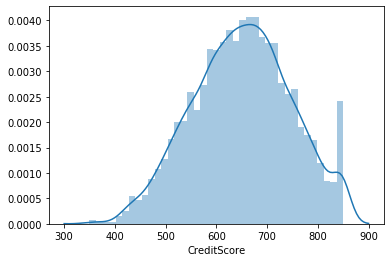

In [12]:
sns.distplot(train_data.CreditScore)

<IPython.core.display.Javascript object>

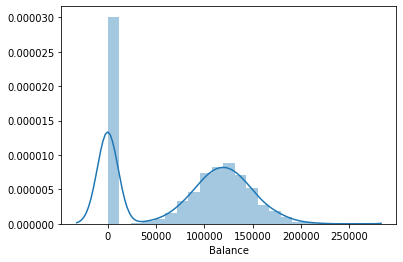

In [13]:
sns.distplot(train_data.Balance)

<IPython.core.display.Javascript object>

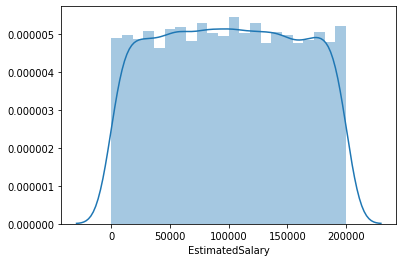

In [14]:
sns.distplot(train_data.EstimatedSalary)

In [15]:
categorical_features = ["Gender","HasCrCard","IsActiveMember"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

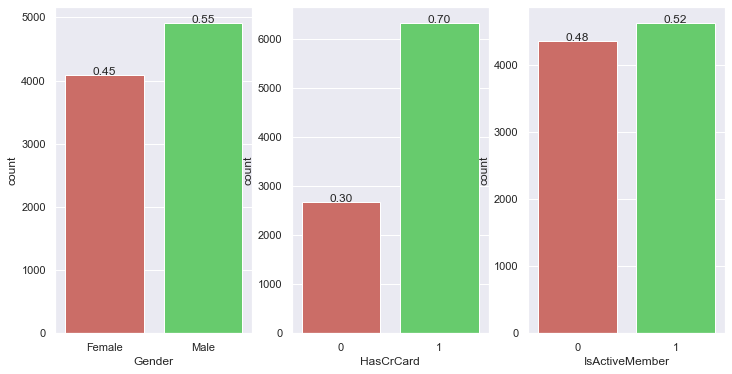

In [16]:
fig = plt.figure(figsize=(12,6))

for i in range(0,3):
    col = categorical_features[i]
    sns.set(style="darkgrid")
    sns.set_palette("hls",3)
    ax = fig.add_subplot(1, 3, i+1)
    ax = sns.countplot(x = col,data=train_data)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,
            height+3,
            '{:1.2f}'.format(height/train_data.shape[0]),
            ha="center")

Here we have numerical features lke CreditScore, Age, Tenure, Balance and EstimatedSalary. So first we check the correlation between them, to know if they are correlated in between or not.

<IPython.core.display.Javascript object>

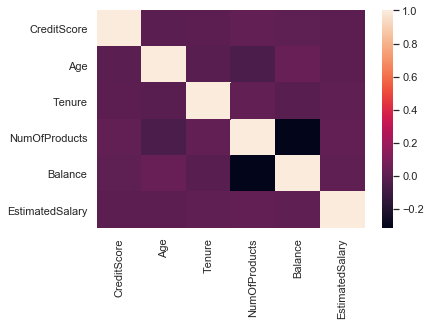

In [17]:
num_feature_corr = data[["CreditScore", "Age", "Tenure","NumOfProducts","Balance", "EstimatedSalary"]].corr(method="spearman")
sns.heatmap(num_feature_corr)

There is no correlation between the numerical columns.

### Now Let's perform chi-sqaure test to check relation between the categorical features.

In [22]:
def chi_Square_test(index,column):
    """ Perform chi-square test on two categorical features"""
    print(f"Chi2 Test for {index} & {column} ")
    ct = pd.crosstab(index=train_data[index],columns=train_data[column])
    (chi2,p,dof,_) = stats.chi2_contingency([ct.iloc[0].values,ct.iloc[1].values])
    print("Chi 2",chi2)
    print("p-value :",p)
    print("dof :",dof)
    print("Cramer's V",np.sqrt(chi2/len(data)))

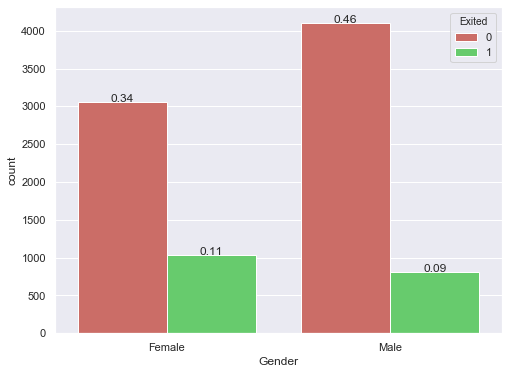

In [23]:
#major the effect of gender feature of target varible
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "Gender",hue = "Exited",data=train_data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
           height+3,
           '{:1.2f}'.format(height/train_data.shape[0]),
           ha="center")

#### The above graph shows that Ratio of Female is slightly higher then male

In [24]:
chi_Square_test("Gender","Exited")

Chi2 Test for Gender & Exited 
Chi 2 104.31735935062488
p-value : 1.7237217047256943e-24
dof : 1
Cramer's V 0.1021358699726129


P-vale is very low and chi2 value is very much high it show that Gender feature have a significat effect on the target variable.

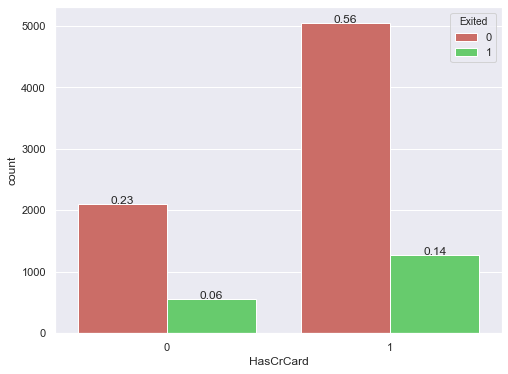

In [25]:
#major the effect of gender feature of target varible
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "HasCrCard",hue = "Exited",data=train_data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
           height+3,
           '{:1.2f}'.format(height/train_data.shape[0]),
           ha="center")

### The Graph shows that male crdit card holder churn more then female customer.

In [26]:
chi_Square_test("HasCrCard","Exited")

Chi2 Test for HasCrCard & Exited 
Chi 2 0.8429445510462296
p-value : 0.35855598348147244
dof : 1
Cramer's V 0.009181201179836054


P-vale is very high and chi2 value is very much low, also the Cramer's V value is also very low; it show that HasCrCard feature has no significat effect on the target variable. We can drop that column to reduce the dimention of the dataset.

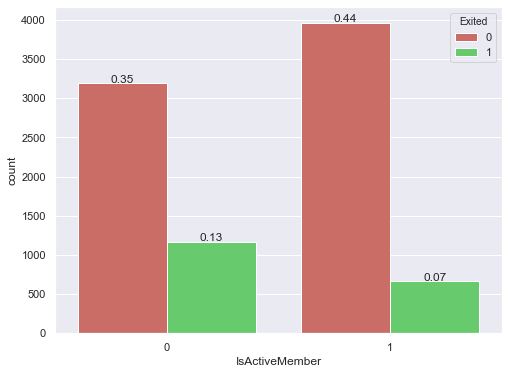

In [27]:
#major the effect of gender feature of target varible
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "IsActiveMember",hue = "Exited",data=train_data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
           height+3,
           '{:1.2f}'.format(height/train_data.shape[0]),
           ha="center")

The plot shows that female which are not a active member are more churn in comparison to males.

In [28]:
chi_Square_test("IsActiveMember","Exited")

Chi2 Test for IsActiveMember & Exited 
Chi 2 210.32077538492047
p-value : 1.169181561714319e-47
dof : 1
Cramer's V 0.14502440325163227


P-vale is very low and chi2 value is very much high it show that IsActiveMember feature have a significat effect on the target variable.

#### Now perform the chi-square test for IsActiveMember and Gender

In [29]:
chi_Square_test("IsActiveMember","Gender")

Chi2 Test for IsActiveMember & Gender 
Chi 2 4.525301754941613
p-value : 0.03339718547256278
dof : 1
Cramer's V 0.021272756650095006


As the chi-sqaure value is very low which advocate that IsActiveMember and Gender are not related to each other. So we have to consider both features in our dataset.